# Statistical Inference

So far, we have seen methods for describing a sample of data (descriptive statistics) and we have reasoned on abstract concepts using basic probability theory concepts. In practice, we are often interested in the properties of a **population**, rather than a sample or some abstract quantities. Examples are:
* What are the percentage of votes each candidate will get at an election?
* What is the proportion of defective goods in a manufacturing process?
* Is there a relationship between smoking and developing a given disease in the world population?

One approach to answer these questions would be to collect the whole population, but this is often unfeasible (e.g., interviewing **all voters**) and sometimes impossible.

The statistician's approach is instead to **sample** a subset of the whole population and try to **infer some of the properties of the population from the sample**. This part of statistics is called **statistical inference**. Analyzing data using such techniques is often called an **inferential analysis**. In this part of the course, we will review different statistical tools for inferential analysis and show some concrete examples, without giving a formal definition of such tools, which is left to other courses.

## Sampling
The first step towards an inferential analysis is the **sampling process**. When we acquire a pre-made dataset, sampling is already done, while when we collect data, we are actually sampling from the population. In both cases, it is important to reason on the properties of the sample we will work on.

### Simple random sample
The easiest way to sample from a population is **randomly**. A simple random sample makes two assumptions:
* **Unbiasedness**: each element of the population has the same probability of being selected;
* **Independence**: selecting one of the elements of the population does not affect the selection of the other elements in any way.

This approach guarantees that, if we collect a large number of elements, the obtained sample will be a good representative of the population. For instance, if in the population of interest we have $10\%$ of people over $70$, we expect this proportion to be roughly represented in the sample as well.

An example of bad sampling:

> We want to ask the inhabitants of a city whether they are satisfied with the quality of life in that city. To sample a large quantity of subjects, we go to the main square and ask passengers to reply to a few questions. If a ground of friends stops we interview all of them to maximize the number of examples we can obtain.

The sampling design outlined above has two important issues:
* **Unbiasedness**: the selection process is biased (**selection bias**). We selected a single location in the city (the main square) and hence we are **oversampling** people who tend to spend time there (e.g., because they work in the city center), versus people who do not spend much time there (e.g., because they work in the periphery).
* **Independence**: when we interview groups of people, in fact, we are breaking the independence assumption, Indeed, selecting one of the people is not independent of selecting others (the members of the same group).

Another example of flawed sampling:

> We want to check how many people believe a given conspiracy theory. To do so, I send a message to all my contacts ($500$). About $200$ of them reply to my message and $180$ of them say they do believe that theory. $80\%$ of people actually believe it!

Also here there are important issues:
* **Selection bias**: I am not randomly sampling. Instead, I am choosing among my contacts.
* **Response bias**: Only $200$ people replied. Chances are that only people who are very motivated will reply. Maybe most of the believers did, while the others just ignored my message.

Another example:

> We interview people on their voting preferences by dialing random phone numbers.

While this may seem sound, we will not end up with a simple random sample because we will not select people without a phone number and we will oversample people with more than one numbers (e.g., work and home).

## Sample Size and Standard Error
While the **way we sample** is fundamental, also its size is very important. Intuitively speaking, a survey on a small number of people is probably not very accurate. Indeed, we expect that, **if the sample is small, it is easier to obtain a biased representation of the population by chance**. In general, the larger the sample, the better, but is there a way to estimate what a good size would be for my sample?

Let's consider this example:

> A factory produces chips. Among all chips produced, about $p\%$ will be defective (i.e., a chip has probability $p$ to be defective). We want to estimate this probability. To do it directly, we should test each chip. The defect rate $p$ will be given by the fraction of defective chips: $p=\frac{x}{N}$, where $x$ is the number of defective chips and $N$ is the total number of chips. However, testing all chips would slow down production, so this is not feasible. Instead, we choose to test a random sample of all chips and estimate the defect rate from this sample: $\hat p = \frac{x}{n}$, where $n$ is the sample size. Now the question is: given that my sample has size $n$, what is the error that I will likely make estimating $p$ with $\hat p$?

To answer this question, we need to introduce the concept of **sampling distribution**. What we expect is that, if we draw many random samples in the same way, we will end up with different estimates of $\hat p$. If these estimates are similar to each other, then the error will probably be small, but if these estimates will be significantly different, then my error is large.

For example, consider the following $10$ samplings with size $50$:

| Sample Size \(n = 50\) | Defective Chips \(x\) | Estimated Defect Rate ($\hat{p} = \frac{x}{n}$)|
|------------------------|-----------------------|------------------------------------------------|
| 50                     | 0                     | 0.000                                          |
| 50                     | 1                     | 0.020                                          |
| 50                     | 2                     | 0.040                                          |
| 50                     | 4                     | 0.080                                          |
| 50                     | 3                     | 0.060                                          |
| 50                     | 5                     | 0.100                                          |
| 50                     | 3                     | 0.060                                          |
| 50                     | 2                     | 0.040                                          |
| 50                     | 1                     | 0.020                                          |
| 50                     | 4                     | 0.080                                          |


If we repeat the experiment for a larger number of times (e.g., $1000$), we could imagine the distribution of $x$ (number of defective chips) to follow a similar trend:

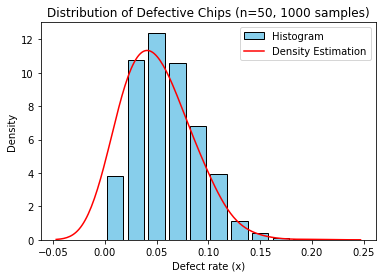

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters for the simulation
n = 50      # Sample size
p = 0.05    # True defect rate
num_samples = 1000  # Number of simulated samples

# Simulate the number of defective chips in each sample (binomial distribution)
defective_chips_simulated = np.random.binomial(n=n, p=p, size=num_samples)/n

# Create a histogram of the simulated data
plt.hist(defective_chips_simulated, rwidth=0.8, color='skyblue', edgecolor='black', density=True, label='Histogram')

# Add a kernel density estimation (KDE) plot
sns.kdeplot(defective_chips_simulated, color='red', label='Density Estimation',bw_adjust=2)

# Add labels and title
plt.xlabel('Defect rate (x)')
plt.ylabel('Density')
plt.title(f'Distribution of Defective Chips (n={n}, {num_samples} samples)')

# Show legend
plt.legend()

# Show plot
plt.show()


We can see a peak at about $2$, but there is some variability in the measurements. The variability is given by the fact that $50$ is a small sample size. The plot below shows examples of what we would observe for different sample sizes:

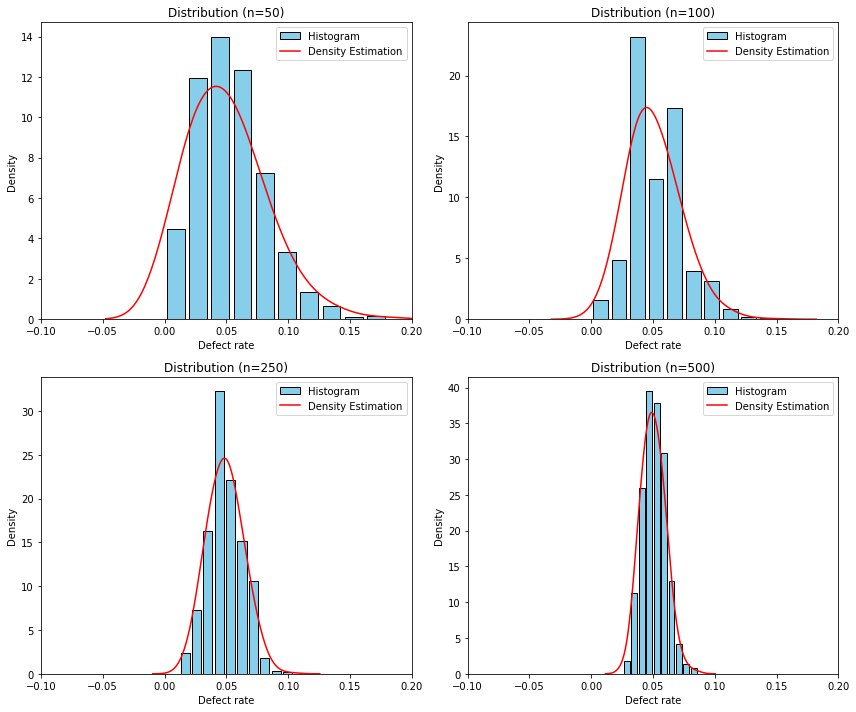

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters for the simulation
sample_sizes = [50, 100, 250, 500]  # Different sample sizes
p = 0.05  # True defect rate
num_samples = 1000  # Number of simulated samples per sample size

# Create a plot for each sample size
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid of subplots
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, n in enumerate(sample_sizes):
    # Simulate the number of defective chips for each sample size
    defective_chips_simulated = np.random.binomial(n=n, p=p, size=num_samples)/n
    
    # Plot histogram
    axes[i].hist(defective_chips_simulated, rwidth=0.8, color='skyblue', edgecolor='black', density=True, label='Histogram')

    # Add a kernel density estimation (KDE) plot
    sns.kdeplot(defective_chips_simulated, color='red', label='Density Estimation', bw_adjust=2, ax=axes[i])

    # Add labels and title for each subplot
    axes[i].set_xlabel('Defect rate')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Distribution (n={n})')
    axes[i].legend()
    axes[i].set_xlim([-0.1,0.2])



# Adjust layout for better readability
plt.tight_layout()

# Show plot
plt.show()


As we can see, the mean is always around $0.05$, but the standard deviation decreases as the sample size increases. This suggests that **the error in the estimation of the real defect rate decreases with large samples**.

In practice, we can see the act of **taking a random sample of size $50$ ad a random experiment** and introduce a random variable $X$ depending on the sampling process. In particular we will define:

$$X = \text{number of defective chips in the sample}$$

Also the estimated defect rate will be a random variable:

$$\hat P = \frac{X}{n} $$

As can be noted, $X$ can be modeled with a **Binomial distribution** (the probability of having $k$ successes in a sequence of $n$ independent experiments with probability $p$). Recall we have:

$$E[X] = np$$
$$Var[X] = np(1-p)$$

In turn we have:

$$E[\hat P] = E[\frac{X}{n}]=p$$
$$Var[\hat P] = Var\left[\frac{X}{n}\right] = \frac{p(1-p)}{n}$$
$$Std[\hat P] = \frac{\sqrt{p(1-p)}}{\sqrt{n}}$$

If can be shown (but we will not see it formally) that for large values of $n$, $\hat P$ will be approximately normal. 

Note that the $Std[\hat P]$ depends in fact on the true probability $p$, which is in general not available. So, in its place, it is common to consider the **standard error** of $\hat P$:

$$SE(\hat p) = \frac{\sqrt{\hat p(1-\hat p)}}{\sqrt{n}}$$

Note that, since the sampling distribution of $\hat P$ is approximately normal, a low standard deviation means that we are more accurately estimating the true mean $p$, hence we have a **lower error**.

We can see that, as we draw samples, the estimated probabilites $\hat p$ will distribute around the mean value $p$ with a standard deviation which is **proportional** to:

$$\frac{1}{\sqrt{n}}$$

Very informally, we will say that:

$$SE(\hat p) \propto \frac{1}{\sqrt{n}}$$

**This result is very important: if we want to reduce the error in the estimation of a property of the population, we need to increase the sample size.**

In our example above, if we set:

$$n=50, p=0.05$$

we will have a standard error equal to:

In [39]:
print(f"{np.sqrt(0.05*(1-0.05)/59):0.2f}")

0.03


If we set $n=1000$, we obtain a standard error of about:

In [34]:
print(f"{np.sqrt(0.05*(1-0.05)/1000):0.2f}")

0.01


## Confidence Intervals

We have seen that, if we try to estimate the true defect rate $p$ from a sample of size $n$, then the estimated rate $\hat p$ will be characterized by a standard error of:

$$SE(\hat p) = \frac{\sqrt{\hat p(1-\hat p)}}{\sqrt{n}}$$

If we fix $p$ (this is the value we want to estimate, we don't have much control on it), then small values of $n$ will lead to large errors, while large values of $n$ will lead to small errors. In particular, a sample **$4$ times bigger will reduce the error by $\frac{1}{2}$**.

So what should we do to obtain a small error? We should certainly take a large sample. However, sampling is generally costly, so it is not always possible to take large samples. Moreover, how large should a sample be to obtain a small enough error?

Let's suppose **we accept a maximum defect rate of $5\%$**, meaning that, if the defect rate is larger than $5\%$, then it is not convenient anymore to keep the current pipeline. We take a sample of $500$ chips and find that $20$ are defective. We compute a defect rate of:

$$\hat p = \frac{20}{500} = 0.04$$

which is below $0.05$. 

Are we happy? We actually know that this is **one of the values that we may have obtained considering a sample of $500$ chips from the population**. We also know that these numbers follow a Gaussian distribution of mean $p$ and standard deviation 

$$\sigma(\hat p) = \frac{\sqrt{p(1-p)}}{\sqrt{n}}$$

Recall that about $68.3\%$ of the density of the Gaussian distribution will be within $p-\sigma(\hat p)$ and $p+\sigma(\hat p)$, so we can write:

$$P\left(p-\sigma(\hat p)\leq \hat p \leq p+\sigma(\hat p)\right) = 0.683$$

Which means that, if we perform several independent samplings, with sample size $n$, the probability of obtaining a defect rate $\hat p$ in the range $[p-\sigma(\hat p), p+\sigma(\hat p)]$ is $68.3\%$.

It is easy to show that:

$$\hat p \in [p-\sigma(\hat p), p+\sigma(\hat p)] \Leftrightarrow p \in [\hat p-\sigma(\hat p), \hat p+\sigma(\hat p)]$$

This is graphically shown in the plot below. The blue segment is the one of bounds $[p-\sigma(\hat p), p+\sigma(\hat p)]$. Note that, all times a point $\hat p$ happens to be in the blue segment centered around $p$, then $p$ is in the segment centered around $\hat p$.

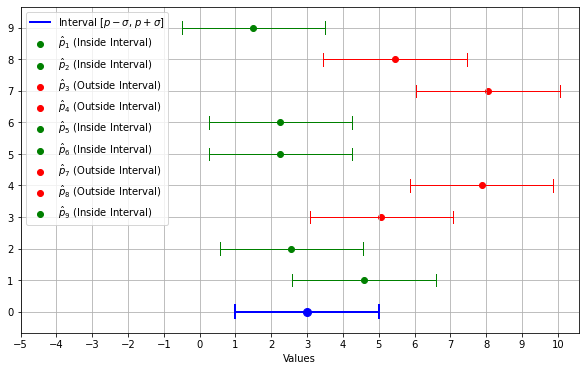

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

# Parameters
p = 3
sigma = 2
num_samples = 9

# Generate data
x = np.linspace(p - 4 * sigma, p + 4 * sigma, 1000)

# Sample some \hat p values
points = np.random.normal(p, 1.6 * sigma, num_samples)

# Create the plot
plt.figure(figsize=(10, 6))

j = 0

# Plot the point "p" and interval
plt.plot([p - sigma, p + sigma], [j, j], 'b', lw=2, label=f'Interval [$p-\sigma$, $p+\sigma$]')
plt.plot([p - sigma, p - sigma], [j - 0.2, j + 0.2], 'b', lw=2)
plt.plot([p + sigma, p + sigma], [j - 0.2, j + 0.2], 'b', lw=2)
plt.plot(p, j, 'bo', markersize=8)
j+=1

# Plot the sampled \hat p values and intervals
for i in range(num_samples):
    c = 'r'
    lab = 'Outside'
    if points[i] <= p+sigma and points[i] >= p-sigma:
        c = 'g'
        lab = 'Inside'
    plt.plot([points[i] - sigma, points[i] + sigma], [j, j], c, lw=1)
    plt.plot([points[i] - sigma, points[i] - sigma], [j - 0.2, j + 0.2], c, lw=1)
    plt.plot([points[i] + sigma, points[i] + sigma], [j - 0.2, j + 0.2], c, lw=1)
    plt.scatter(points[i], j, marker='o', color=c, label=f'$\hat p_{i + 1}$ ({lab} Interval)')
    j+=1
    
# Set labels and title
plt.xlabel('Values')
#plt.yticks([1] + [3 + i for i in range(num_samples)] + [5 + num_samples], ['p'] + [f'𝜂𝑝{i + 1}' for i in range(num_samples)] + [''])
plt.yticks(np.arange(num_samples+1))
plt.xticks(np.arange(np.min(x),np.max(x)))
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


This allows us to write:

$$P\left(\hat p-\sigma(\hat p)\leq p \leq \hat p+\sigma(\hat p)\right) = 0.683$$

which has a powerful interpretation:

> If we draw many independent samples of size $n$ and compute $\hat p$ from the samples, the true mean $p$ will lie in the interval $[\hat p-\sigma(\hat p), \hat p+\sigma(\hat p)]$ $68.3\%$ of the times

Alternatively

> We can say with a confidence of $68.3\%$ that the true mean will be in the $[\hat p-\sigma(\hat p), \hat p+\sigma(\hat p)]$ interval

In this context, $[\hat p-\sigma(\hat p), \hat p+\sigma(\hat p)]$ is called a **confidence interval**.

We still have to compute actual numbers for our confidence interval, but we don't have the standard deviation $\sigma(\hat p)$. In practice, we replace it with the standard error and obtain the confidence interval:

$$[\hat p-SE(\hat p), \hat p+SE(\hat p)]$$

In our case: 

$$\hat p = \frac{20}{500} = 0.04$$

$$SE(\hat p) = \frac{\sqrt{\hat p(1-\hat p)}}{\sqrt{n}} = \frac{\sqrt{\hat p(1-\hat p)}}{\sqrt{n}} = \frac{\sqrt{\hat 0.4(1-0.4)}}{\sqrt{500}} = 0.009$$

Hence our confidence interval will be:

$$[0.04-0.009, 0.04+0.009] = [0.031,0.049]$$

We can say with $68\%$ confidence that $\hat p$ will be between $3.1\%$ and $4.9\%$. This looks like good news, the maximum defect rate is still under $5\%$!

However, a $68\%$ confidence seems to be rather low - still, in $32\%$ of the cases, the true defect rate could be outside the confidence interval. What can we do to increase confidence? Well, we know that about $95.5\%$ of the density of the Gaussian distribution is between $-2\sigma$ and $2\sigma$. We can update our confidence interval as:

$$[\hat p-2SE(\hat p), \hat p+2SE(\hat p)] = [0.022, 0.058]$$

Now we can say with $95.5\%$ confidence that the true defect rate will be in the $[0.022, 0.058]$. What happened? To increase our confidence, we obtained a larger range. Of course, we could say that the true defect rate is comprised between $[0,1]$ with $100\%$ probability!

Our "new" confidence interval does not support our hypothesis that the defect rate is under $0.05$, but at the same time, it's a very large interval...it does not refute the hypothesis either. **How can we narrow this interval?** We know that, if we had a larger $n$, our standard error would be smaller. We hence increase our sample and check another set of $1500$ boards. We get $82$ defective boards over the $2000$ we tested, with an estimated defect rate:

$$\hat p = \frac{82}{1000} = 0.41$$

The standard error is:

$$SE(\hat p) = \frac{\sqrt{\hat p(1-\hat p)}}{\sqrt{n}} = \frac{\sqrt{\hat p(1-\hat p)}}{\sqrt{n}} = \frac{\sqrt{\hat 0.41(1-0.41)}}{\sqrt{2000}} = 0.004$$

The updated confidence interval with $95.5\%$ confidence will be:

$$[\hat p-2SE(\hat p), \hat p+2SE(\hat p)] = [0.033, 0.049]$$

We now have a reasonably narrow confidence interval at a $95.5\%$ confidence level. Moreover, our "maximum" true defect rate will be lower than $0.49$, so we are happy about the result.

What if we wanted to be sure at exactly $99\%$? Well in that case we can use the inverse of the CDF (which is called a PPF) and compute the right multiplier $\alpha$ in order to compute the confidence interval:

$$[\hat p-\alpha SE(\hat p), \hat p+\alpha SE(\hat p)]$$



We will not see it into details, but for $99\%$ we will get:

In [ ]:
import scipy.stats as stats

defect = 82
all = 2000
rate = defect/all
se = np.sqrt(rate*(1-rate))/np.sqrt(all)

# Probability (percentile) at which you want to compute the quantile
probability = 0.99

alpha = stats.norm.ppf(1-(1-probability)/2, loc=0, scale=1)

#quantile_value = stats.norm.ppf((1-probability)/2, loc=0, scale=1)
#quantile_value2 = stats.norm.ppf(1-(1-probability)/2, loc=0, scale=1)

#print(f"Quantile at {probability * 100}% percentile is {quantile_value:.4f}")
#print(f"Quantile at {probability * 100}% percentile is {quantile_value2:.4f}")

print(f"alpha = {alpha:.4f}")
print(f"Confidence interval: [{rate-alpha*se:0.3f}, {rate+alpha*se:0.3f}]")

alpha = 2.5758
Confidence interval: [0.030, 0.052]


We're not very happy about this result, the true defect rate could be larger than $5\%$. What can we do? Again, we could collect a larger sample to narrow down the confidence interval.

## Bias and Variance of Estimators
In the example above, we have seen that we can use the formula

$$\hat p = \frac{x}{n}$$

as a way to estimate the true value of $p$. We will call the formula above an **estimator**, while its result $\hat p$, an **estimate**.

Let again consider the random variable arising from multiple random samples:

$$\hat P = \frac{X}{n}$$

We expect that this estimator will give different results depending on sampling, leading to a distribution of values. In practice, it is important to measure two important aspects of an estimator, namely, its **bias** and its **variance**.

### Bias of an Estimator
Let $X$ be a random variable (e.g., the heights of all people in the world) and let $x=(x_1,x_2,\ldots,x_n)$ be a realization of $X$ (a sample from the population). Let $T(X)$ be an estimator of the true value $\phi$ depending on the variable $X$. For instance, $\phi$ could be the mean value of all heights. $T(X)$ is then an estimator of the mean and $\hat \phi = T(x)$ is the estimate we obtain considering the sample $x$, for instance:

$$T(x) = \frac{\sum_{i=1}^n x_i}{n}$$

Note that **$T(x)$ is a random variable**, while $T(x)$ is the value we obtain when we consider the realization $x$.

We will define the **bias** of the estimator as:

$$Bias_\theta (T(X)) = E_\theta[T(X)] - \phi$$

That is to say, the **difference between the expected value of the estimate (under different samplings) minus the true value of the quantity we are trying to estimate**.

We will say that an estimator $T(X)$ is an unbiased estimator of $\phi$ if:

$$E_\theta[T(X)] = \phi$$

or equivalently:

$$Bias_{\phi}(T(X)) = 0$$

The bias indicates if the estimator **systematically underestimate or overestimate the property of the population we are interested in**. A bias equal to zero means that, **on average** our estimates will be close to true value. This means that, if we could perform sampling many times and take the average of the estimates, we would get a value close to the true one.

#### Unbiased Estimators for Sample Mean and Variance
Let us consider a univariate sample $\{X^{(i)}\}_{i=1}^n$. The mean estimator:

$$
\overline x = \frac{1}{n} \sum_{i=0}^{n} x^{(i)};
$$

is unbiased. This means that **if we draw a large number of random samples, we compute their mean and then we compute the mean of their mean, this last value will converge to the population mean as the sample size $n$ gets larger**.

The estimator for the variance:

$$
s_n^2=\frac{1}{n}\sum_{i=0}^{n}(x^{(i)}-\overline x)^2
$$

is known to be **biased**. In practice, it can be shown that this estimator systematically underestimates the variance. In particular:

$$
\mathbf{E}[s_n^2]=\frac{n-1}{n}\sigma^2
$$

where $\sigma^2$ is the variance of the population. An unbiased estimator for the variance is given by:

$$
s_{n-1}^2=\frac{1}{n-1}\sum_{i=0}^{n}(x^{(i)}-\overline x)^2
$$

Note that this approaches to $s_{n}^2$ as $n \to \infty$. In practice:

* When $n$ is small, it does make sense to use the unbiased estimator $s_{n-1}^2$ if we want to estimate the variance of the population;
* When $n$ is very large, the two estimates will be similar (often equivalent).

### Variance of an Estimator
The variance of $T(X)$ is defined as:

$$Var_\phi(T(X)) = E[(T(X)-E(T(X)))^2]$$

That is, the variance of the random variable T(X). The variance measures another characteristic of the estimator, telling us **how disperse the different estimates will be**. A low variance indicates that, if we perform sampling multiple times and take different estimates, we **end up with similar values**. A high variance indicates that different samplings will lead to drastically different estimates.

### Bias-Variance Tradeoff
Ideally, we would like our estimates to have **low variance and low bias**. Indeed, in this case we would be sure that each estimate will be close to the true value. Indeed, since we have **low variance** estimates will be close to each other, while, since we have **low bias** the average (and hence all estimates) will be close to the true value.

In practice, we can distinguish four cases, described in the plot below. In the plot, the true value is the center of the circle, while each point is a different estimate. The circle represents a range of values which we may define as **acceptable estimates**. Alternatively, we can see the circe as a target and each estimate as a dart we are throwing at the target.

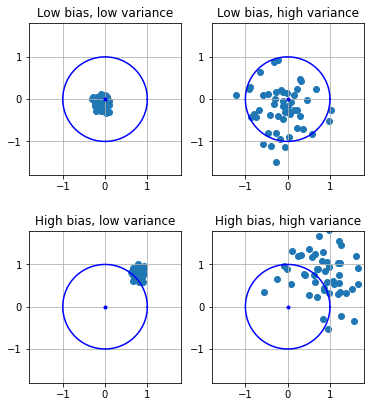

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
# Define the parameters for the target circle
circle_radius = 1
circle_center = (0, 0)

# Create an array of angles to generate points on the circle
angles = np.linspace(0, 2 * np.pi, 100)

# Calculate the coordinates of points on the circle
x_circle = circle_center[0] + circle_radius * np.cos(angles)
y_circle = circle_center[1] + circle_radius * np.sin(angles)

# Generate random points (darts) with different bias-variance configurations
num_darts = 50
np.random.seed(0)
x_darts = np.random.uniform(-1.5, 1.5, num_darts)
y_darts = np.random.uniform(-1.5, 1.5, num_darts)

# Create different bias-variance configurations
biases = [-0.1, 0.8]
variances = [0.1, 0.5]

# Create subplots for different bias-variance configurations
plt.figure(figsize=(6, 7))

titles = [
    'Low bias, low variance',
    'Low bias, high variance',
    'High bias, low variance',
    'High bias, high variance'
]
h = 0
for i, bias in enumerate(biases):
    for j, variance in enumerate(variances):
        plt.subplot(len(biases), len(variances), i * len(variances) + j + 1)

        # Add the target circle
        plt.plot(x_circle, y_circle, label="Target", color="blue")
        plt.plot(0, 0, '.',label="Target Center", color="blue")

        dart_color = np.random.rand(3,)  # Random color for each dart
        #dart_x = x_darts[k] + bias + np.random.normal(0, variance)
        #dart_y = y_darts[k] + bias + np.random.normal(0, variance)
        x_darts = np.random.normal(bias, variance, num_darts)
        y_darts = np.random.normal(bias, variance, num_darts)
        plt.scatter(x_darts, y_darts)

        plt.xlim(-1.8, 1.8)
        plt.ylim(-1.8, 1.8)
        plt.gca().set_aspect('equal', adjustable='box')
        #plt.legend(loc="upper right")
        plt.title(titles[h])
        h+=1
        #plt.xlabel("X-axis")
        #plt.ylabel("Y-axis")
        plt.grid()

#plt.tight_layout()
plt.show()


The four cases are:
* Low bias, low variance: all estimates will be close to the true value;
* Low bias, high variance: in average, estimates will be close to the true value, but different estimates may greatly differ;
* High bias, low variance: while different estimates will be similar, they all are very far away from the true value;
* High bias, high variance: we don't have many guarantees - estimates will all be different, but also far from the real value, even in average.

It's clear that having low bias and low variance is desirable, but, as we will see, this is not always easy to achieve. In practice, we'll see that in many cases it there is a trade-off between bias and variance, meaning that **we can tweak our estimator to find a balance between these two properties**.

## Sampling Distribution of the Mean

Let us now consider another example. Besides producing non-defective chips, our facility also manufactures specific electronic components which need to have a given diameter. The process requires high precision, so we need the diameters of these components all equal to the same value of $0.1nm$ with very small deviations allowed.

We sample $n=1000$ of such components and measure their diameters $x_1,\ldots,x_n$. We then compute the mean, obtaining:

$$\overline x = \frac{x_1+x_2+\ldots+x_n}{n} = 0.1001nm$$

This value is close to $1.1nm$, so we could conclude that the quality of the production process is good enough. However, we can imagine how, if we drew another sample, we could obtain a slightly different result. The questions are **"how close that result would be to the one we obtained"** and **"how close this result is to the population mean"**.

Similarly to what we observed in the case of the defect rate, we can see the diameter of a single component as a random variable $X_i$. We will have:

$$E[X_i] = \mu$$
$$Std[X_i] = \sigma$$

Where $\mu$ and $\sigma$ are the population mean and standard deviation. The average of the diameters of the components in our sample will be in turn a new random variable:

$$\overline X = \frac{X_1+X_2+\ldots+X_n}{n}$$

We will have:

$$E[\overline X] = \mu$$
$$Std[\overline X] = \frac{\sigma}{\sqrt{n}}$$

Again, the standard deviation is proportional to $\frac{1}{\sqrt{n}}$.

While in the previous case, the shape of each $X_i$ variable was binomial (and hence similar to Gaussian), in this case, we cannot make any assumption on the shape of $X_i$. However, the **central limit theorem** guarantees that, when $n$ is large, $\overline X$ will indeed **follow a Gaussian distribution**.

This result allow us to characterize the distribution of the means, which is useful to understand if our production is high quality enough.

However, we still have two problems:
* $\overline X$ is Gaussian only for large values of $n$;
* We need the true standard deviation $\sigma$.

To overcome these problems, we will replace the true standard deviation $\sigma$ with the **next best thing**, the standard deviation of the sample:

$$s_{n-1} = \frac{1}{n-1}\sum_{i=1}^n (x_i - \overline x)^2$$

We still know that **the distribution will be Gaussian only for large values of n**. In practice, it turns out that $\overline X$ follows a similar distribution for an arbitrary $n$, the t-Student distribution. 

More specifically, we will say that the standardized variable:

$$t_{n-1} = \frac{\overline X - \mu}{s_{n-1}/\sqrt{n}}$$

follows a t-Student distribution with $n-1$ degrees of freedom. **This standardized form will be useful when we'll talk about hypothesis tests**. The t-Student distribution looks like a Gaussian, but it is more uncertain than a Gaussian for small values of $n$, as shown in the following:

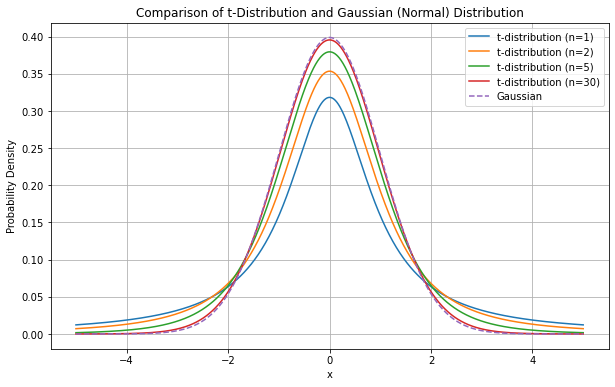

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# Define a range of degrees of freedom (df) values
df_values = [1, 2, 5, 30]

# Create a range of x values for the PDF
x = np.linspace(-5, 5, 1000)

# Create a figure to hold the plot
plt.figure(figsize=(10, 6))

# Iterate through each degrees of freedom value and create plots for t-distribution and Gaussian
for df in df_values:
    # Calculate the PDF values for the t-distribution with the current df
    pdf_t = t.pdf(x, df)
    
    # Calculate the PDF values for a standard Gaussian (normal) distribution
    pdf_normal = norm.pdf(x)
    
    # Create line plots for the t-distribution and Gaussian with labels
    plt.plot(x, pdf_t, label=f't-distribution (n={df})')

plt.plot(x, pdf_normal, label='Gaussian', linestyle='--')

# Add labels and a legend
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Comparison of t-Distribution and Gaussian (Normal) Distribution')
plt.legend()

# Show the plot
plt.grid()
plt.show()


As $n$ gets larger, the t-Distribution approximates a Gaussian distribution.

We can now characterize how the means will distribute. In particular, **for large values of $n$, sample means will distribute according to a Gaussian distribution with standard deviation equal to the sample standard deviation**.

### Confidence Intervals for the Mean
Now that we know that sample means follow a t-Student distribution, we can use this result to compute confidence intervals for the mean. Let's consider again our example in which we wanted to assess the average diameter of our components. Suppose we measured:

$$\overline x = 0.1001nm$$
$$s_{n-1} = 0.01nm$$

with a sample of $n=1000$ measurements.

We know that the random variable $\overline X$ will distribute according to a t-Student distribution with $n-1$ degrees of freedom:

$$\frac{\overline X-\mu}{s/\sqrt{n}}$$

Using the inverse of the CDF function (we will not see the details), we find out that $95\%$ of the density is included between $-1.96\sigma$ and $1.96\sigma$. We hence write:

$$0.95 = P(\overline X -1.96 SE(\overline X) \leq \mu \leq \overline X + 1.96 SE(\overline X))$$

where

$$SE (\overline X) = \frac{s_{n-1}}{\sqrt{n}} = \frac{0.01}{\sqrt{1000}} = 0.0003$$

From which, we get the following confidence interval for a $95\%$ confidence:

$$[0.1001 - 1.96 \cdot 0.0003, 0.1001 + 1.96 \cdot 0.0003 ] = [0.0995, 0.1006]$$

Since the deviations are small, we can say that our estimation of the mean is accurate.

### Computing Confidence Intervals in Practice
We have seen how to compute confidence interval "by hand" in the case of the estimation of proportions (defect rate).In practice, depending on the quantities for which we want to estimate confidence bounds, we will need to use different distributions. For instance, when estimating means, we will have to use the t-Student distribution with $n-1$ degrees of freedom. We will not see all methods in detail, but the main libraries implement all confidence bounds estimation procedure for us.

The main estimation procedures are related to:
* Estimation of confidence bounds for means;
* Estimation of confidence bounds for variances;
* Estimation of confidence bounds for proportions.

We will see how to compute these practically in the laboratory sessions.

## Hypothesis Testing
Confidence bounds provide a set of plausible values for a given statistic of a population estimated from a sample (e.g., the mean, proportions, etc.). A hypothesis test instead attempts to refute a specific claim about the statistic. Examples of hypotheses to be refuted are:

 * The population mean is equal to $0.1$;
 * The means of two populations (e.g., two different production processes) are equal;
 * Proportions of males and females are equally distributed in a given population (e.g., the employees of a company).

If the hypothesis is rejected, we conclude that it is not true. Otherwise, we cannot really prove that it is false, so it makes sense to act as it is were true.

### Hypothesis Testing for Means
We get back to our example of estimating the average diameter of manufactured components. We set our machines to produce components of a diameter of exactly $0.1nm$ and find an empirical average of $0.1001nm$ with a standard deviation of $0.003$. We imagine the difference is due to small errors in measurement, calculation, or manufacturing, so we are keen to conclude that **the population mean is indeed $\mu = 0.1nm$**.

Our boss objects that this may not be the case, and the population mean is not $0.1nm$. He formulates a test to confute the following hypothesis, that he calls the **null hypothesis**:

 > $H_0$: the mean of the population is equal to $\mu_0=0.1nm$
 
He also defines an **alternative hypothesis**, that he is trying to prove:
 
 > $H_a$: the mean of the population is different from $\mu$

Before proceeding, you ask your boss if he is going to accept any margin of error. He answers that he can tolerate a $5\%$ margin of error, i.e., he can tolerate to wrongly reject the null hypothesis and accept the alternative hypothesis only $5\%$ of the times. We will call this value the **significance level**.
 
We hence ask ourselves **"how much does the computed mean $\overline x=0.1001nm$ deviates from the assumed one $\mu_0=0.1nm$"**? that is to say **"how large is the difference $|\overline x - \mu|$"**?

More specifically, we ask ourselves, **"what is the probability of observing a difference larger than $|\overline x - \mu|$ if we repeat sampling many times"**? We know that the answer to this question depends on the distribution of the sample means. Since we know that the means follow a t-Student distribution, then also $\overline x - \mu$ will follow a t-Student distribution. We z-score such difference and compute the test statistic:

$$t = \frac{\overline x - \mu_0}{s_{n-1}/\sqrt{n}} = 1.054$$

* If we perform sampling and obtain a deviation larger than $|\overline x - \mu|$, then we will observe a statistic $z$ larger than $t$.
* If we perform sampling and obtain a deviation smaller than $-|\overline x - \mu|$, then we will observe a statistic $z$ smaller than $-t$.

The probability of obtaining such extreme results is given by:

$$P(|z|>|t|)$$

We call this probability $p-value$.

The p-value is the area under the shaded curve in the plot below:

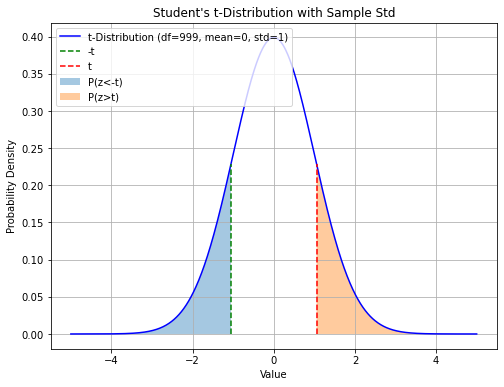

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Define the degrees of freedom, mean, and sample standard deviation
df = 999  # Degrees of freedom
mean = 0
sample_std = 1

# Generate x values
x = np.linspace(mean -  5*sample_std, mean + 5*sample_std, 1000)

# Calculate the probability density function (PDF) for the t-distribution
pdf = t.pdf(x, df, loc=0, scale=1)

statistic = (0.1001-0.1)/(0.003/np.sqrt(1000))

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=f"t-Distribution (df={df}, mean={mean}, std={sample_std})", color='blue')
plt.vlines(-statistic, ymin=0, ymax=t.pdf(-statistic,df), linestyle='--', label='-t', color='g')
plt.vlines(statistic, ymin=0, ymax=t.pdf(statistic,df), linestyle='--', label='t', color='r')

plt.fill_between(x, 0, pdf, where=(x >= min(x)) & (x <= -statistic), alpha=0.4, label="P(z<-t)")
plt.fill_between(x, 0, pdf, where=(x >= statistic) & (x <= max(x)), alpha=0.4, label="P(z>t)")

plt.title("Student's t-Distribution with Sample Std")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


Since the t-Student distribution is symmetrical, we can easily compute this value as:

$$2(1-CDF_t(t))$$

In our case, we obtain:

In [386]:
stat = (0.1001-0.1)/(0.003/np.sqrt(1000))
print(f"{2*(1-t.cdf(stat, df, loc=0, scale=1)):0.2f}")

0.29


This is a large number! How to interpret it?

> If the true mean is $\mu=0.1$ and we repeat sampling many times ($n=1000$), then $30\%$ of the times we obtain a deviation more extreme than the observed one.

We now compare this number to the significance level of $5\%$. If we reject the null hypothesis, we risk to make a mistake $30\%$ of times, which is above the threshold of $5\%$. Hence, **we cannot reject the null hypothesis** under the circumstances.

Does this mean that the two means are the same? We don't know, the test does not tell us what to do in this case! But we may try to collect more measurements hoping to reduce uncertainty.

Our boss wants to prove us wrong, so they collect a total of $n=5000$ examples and obtains:

$$\overline x = 0.10009$$
$$s_{n-1} = 0.0031$$

The mean has decreased a little and the standard deviation has increased marginally. These numbers seem to agree with our previous results. We recompute the statistic and obtain:

In [389]:
stat = (0.10009-0.1)/(0.0031/np.sqrt(5000))
print(f"{stat:0.2f}")

2.05


We hence compute our p-value:

In [390]:
stat = (0.10009-0.1)/(0.0031/np.sqrt(5000))
p=2*(1-t.cdf(stat, df, loc=0, scale=1))
print(f"{p:0.2f}")

0.04


This p-value is now below the threshold of $5\%$. We can now reject the null hypothesis and conclude that the population mean is different from $0.1$. The boss was right, there's something wrong with the process!

#### One-tailed Tests

The tests seen above is a "two-tailed test" in which we summed the areas in the two tails of the distribution. Depending on the form of the alternative hypothesis, in particular:

* If the alternative hypothesis has the form $\mu \neq \mu_0$, then we want to check when the deviation from the assumed mean is larger than the observed one: $P(|x| > |z|)$;
* If the alternative hypothesis has the form $\mu > \mu_0$, then we want to check when the deviation from the assumed mean is positive and larger than the observed one: $P(x > z)$;
* If the alternative hypothesis has the form $\mu < \mu_0$, then we want to check when the deviation from the assumed mean is negative and smaller than the observed one: $P(x < z)$.

This will affect the computation of the p-value as shown in the following figure:

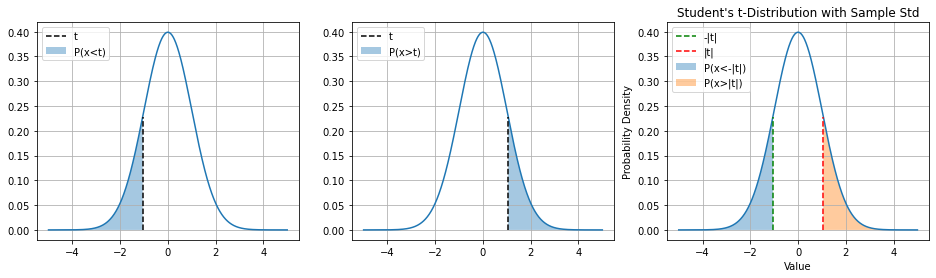

In [408]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Define the degrees of freedom, mean, and sample standard deviation
df = 999  # Degrees of freedom
mean = 0
sample_std = 1

# Generate x values
x = np.linspace(mean -  5*sample_std, mean + 5*sample_std, 1000)

# Calculate the probability density function (PDF) for the t-distribution
pdf = t.pdf(x, df, loc=0, scale=1)

statistic = (0.1001-0.1)/(0.003/np.sqrt(1000))

# Create the plot
plt.figure(figsize=(16, 4))
plt.subplot(131)
plt.plot(x, pdf)
plt.vlines(-statistic, ymin=0, ymax=t.pdf(-statistic,df), linestyle='--', label='t', color='k')

plt.fill_between(x, 0, pdf, where=(x >= min(x)) & (x <= -statistic), alpha=0.4, label="P(x<t)")
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(132)

plt.plot(x, pdf)
plt.vlines(statistic, ymin=0, ymax=t.pdf(statistic,df), linestyle='--', label='t', color='k')
plt.fill_between(x, 0, pdf, where=(x >= statistic) & (x <= max(x)), alpha=0.4, label="P(x>t)")
plt.grid(True)
plt.legend(loc='upper left')



plt.subplot(133)
plt.plot(x, pdf)

plt.vlines(-statistic, ymin=0, ymax=t.pdf(-statistic,df), linestyle='--', label='-|t|', color='g')
plt.vlines(statistic, ymin=0, ymax=t.pdf(statistic,df), linestyle='--', label='|t|', color='r')

plt.fill_between(x, 0, pdf, where=(x >= min(x)) & (x <= -statistic), alpha=0.4, label="P(x<-|t|)")
plt.fill_between(x, 0, pdf, where=(x >= statistic) & (x <= max(x)), alpha=0.4, label="P(x>|t|)")
plt.legend(loc='upper left')


plt.title("Student's t-Distribution with Sample Std")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


### Hypotheses Tests in General

A hypothesis test generally includes:

 * $H_0$: the **null hypothesis**, e.g., the means of two populations are equal;
 * $H_a$: the **alternative hypothesis**, e.g., the means of two populations are not equal (this determines if the test is one- or two-tailed);
 * a **test statistics** which quantifies how likely it is to reject the null hypothesis. The test statistics follows a specific distribution which depends on the type of statistical tests we are performing. E.g., it can follow a t-Student distribution;
 * a **significance level** $\alpha$ which defines the sensitivity of the test. A common value is $\alpha=0.05$, which means that we can wrongly reject the null hypothesis $5\%$ of the times when it is in fact true. It represents the degree of error that we are willing to accept when performing hypothesis testing. Common values are $0.1$, $0.05$, $0.01$;
 * the **p-value**: this quantifies the probability of sampling a test statistics at least as extreme as the one observed under the null hypothesis. In practice, the p-value measures the probability that the null hypothesis is true but we are observing test statistic leading to rejection nevertheless.
 
The null hypothesis is rejected if the **p-value is larger than the chosen significance level $\alpha$**. We will not see in details all the possible hypothesis tests, but all of them follow a similar scheme.

### Other Important Tests

In this section, we briefly see the main statistical tests which can be used in practice, besides the one for means. We will not see how they are formulated, but we will see how to interpret them. We will see a few other tests when we'll talk about linear regression.

#### One Sample T-Test
This is the test for sample means we have previously seen. It is used to **determine whether the mean of a single sample is significantly different from a known or hypothesized value.**

#### Two Sample T-Test
A two-sample t-test is used to determine if there is a significant difference between the means of two independent samples. It's often used when you want to compare the means of two different populations or treatments. The test assesses whether the difference between the sample means is statistically significant or if it could have occurred due to random chance. Also in this case, the test statistic will follow a t-Student distribution.

Let's consider the height-weight dataset:

In [1]:
import pandas as pd
hw=pd.read_csv('http://antoninofurnari.it/downloads/height_weight.csv')
hw['height'] = (hw['height']/2.54).astype(int)
hw['weight'] = hw['weight']/2.205
hw

,sex,BMI,height,weight
0,M,33.36,74,53.484771
1,M,26.54,70,38.056472
2,F,32.13,61,34.970812
3,M,26.62,68,35.999365
4,F,27.13,66,34.559390
...,...,...,...,...
4226,F,17.12,69,23.862436
4227,M,27.47,69,38.262182
4228,F,29.16,64,34.970812
4229,F,23.68,64,28.388071


If we compute the average `BMI` for males and females we obtain:

In [2]:
hw.groupby('sex')['BMI'].mean()

sex
F    26.929287
M    27.684959
Name: BMI, dtype: float64

We see a small difference. Is this due to chance or is it significant? If we run a two-sample t-test, we obtain the following results:

In [4]:
import scipy.stats as stats

male_bmi = hw[hw['sex']=='M']['BMI']
female_bmi = hw[hw['sex']=='F']['BMI']

# Perform independent two-sample t-test
t_stat, p_value = stats.ttest_ind(male_bmi, female_bmi)

# Define significance level (alpha)
alpha = 0.05

print(f"Test statistic: {t_stat:0.2f}")
print(f"Significance level: {alpha:0.2f}")
print(f"P-value: {p_value:0.2f}")

# Comment on result
if p_value < alpha:
    print("Conclusion: there is a significant difference between the two means.")
else:
    print("Conclusion: there is no significant difference between the two means.")


Test statistic: 4.64
Significance level: 0.05
P-value: 0.00
Conclusion: there is a significant difference between the two means.


#### Chi-Square Test for Independence

The Chi-Square Test for Independence is a statistical test used to determine whether there is an association or independence between two or more categorical variables. This test is particularly useful when we want to assess whether changes in one categorical variable are related to changes in another categorical variable. The typical scenario is to set up a contingency table to compare the observed frequencies (counts) of the joint categories of the two variables to the expected frequencies that would occur under the assumption of independence.

The null hypothesis for the Chi-Square Test for Independence is that **there is no association between the two categorical variables** (they are independent), while the alternative hypothesis suggests that there is an association (they are dependent).

The test statistics follows a Chi-square distribution (we won't see the details) in this case.

Let's consider the Titanic dataset:

In [433]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv',
                     index_col='PassengerId')
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Let's consider the following contingency table:

In [436]:
contingency_table = pd.crosstab(titanic['Pclass'], titanic['Survived'])
contingency_table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


We can visualize the distributions of Survived in the three classes for more clarity:

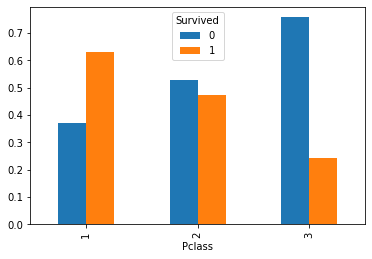

In [439]:
from matplotlib import pyplot as plt
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize=0).plot.bar()
plt.show()

We expect some form of correlation between the two variables. Indeed, the chi-square statistics and Cramer V statistics are:

In [443]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

print(f"Chi-square statistic: {chi2_contingency(contingency_table).statistic:0.2f}")
print(f"Cramer V statistic: {association(contingency_table):0.2f}")

Chi-square statistic: 102.89
Cramer V statistic: 0.34


We have numbers different from zero, but **is this due to chance or is it statistically significant**? If we run a chi-square contingency test:

In [445]:
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency

# Perform the Chi-Square Test for Independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

# Interpret the results
if p < alpha:
    print("\nThere is a significant association between 'Pclass' and 'survived'.")
else:
    print("\nThere is no significant association between 'Pclass' and 'survived'.")


Chi-Square Statistic: 102.88898875696056
p-value: 4.549251711298793e-23

There is a significant association between 'Pclass' and 'survived'.


#### Chi-Square Goodness-of-Fit Test

The Chi-Square Goodness of Fit test is a statistical test used to determine whether observed categorical data (frequencies) fit a specified distribution or expected frequencies. This test is often used to assess whether the observed data deviates significantly from a hypothesized distribution. The typical scenario is to compare observed frequencies with expected frequencies based on a theoretical model or prior knowledge.

The null hypothesis for the Chi-Square Goodness of Fit test is that **there is no significant difference between the observed and expected frequencies**, meaning the observed data fits the specified distribution. The alternative hypothesis suggests that there is a significant difference.

The test statistics follows a Chi-square distribution in this case.

Let us consider the Titanic dataset again. We know that the distribution of `Sex` among passengers is biased:

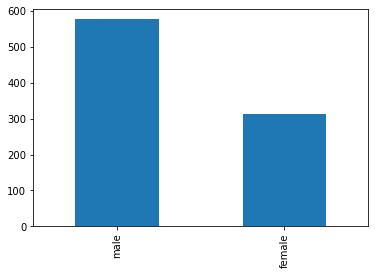

In [463]:
titanic['Sex'].value_counts().plot.bar()
plt.show()

We now consider the distribution of `Sex` among passengers less than $18$ years old:

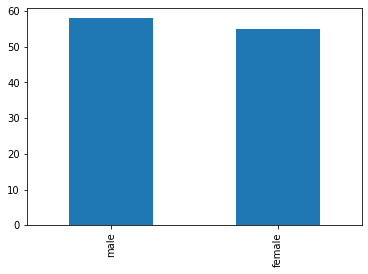

male      58
female    55
Name: Sex, dtype: int64

In [469]:
minor=titanic[titanic['Age']<18]
observed_frequencies = minor['Sex'].value_counts()
observed_frequencies.plot.bar()
plt.show()
observed_frequencies

This looks less biased, but there are still minor differences between the counts. Are these due to chance? If `Sex` was distributed uniformly (as we hypothesize), we would have the following frequencies:

In [468]:
expected_frequencies = [113/2, 113/2]
expected_frequencies

[56.5, 56.5]

We can run a Goodness-of-fit test to check if the observed frequencies match the expected ones:

In [505]:
import seaborn as sns
import pandas as pd
from scipy.stats import chisquare

# Load the Titanic dataset
titanic_data = sns.load_dataset("titanic")

observed_frequencies = minor['Sex'].value_counts().values

# Define expected frequencies that closely match the observed data
expected_frequencies = [113/2, 113/2]

chi2, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("Observed Frequencies:")
print(observed_frequencies)
print("\nExpected Frequencies:")
print(expected_frequencies)
print("\nChi-Square Statistic:", chi2)
print("p-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("\nThe observed data significantly deviates from the expected distribution.")
else:
    print("\nThe observed data fits the expected distribution.")


Observed Frequencies:
[58 55]

Expected Frequencies:
[56.5, 56.5]

Chi-Square Statistic: 0.07964601769911504
p-value: 0.7777776907897473

The observed data fits the expected distribution.


Given the large p-value, we could not reject the null hypothesis that there are significant differences between expected and observed frequencies.

#### Pearson/Spearman Correlation Test

We have seen how to compute Pearson/Spearman correlation coefficient. However, what can we say when we get small values? Are those supposed to be zero, but we got something different from zero due to sampling, or are they significantly different from zero?

The statistical tests associated with the correlation coefficients are used to determine whether the observed correlation between two variables is statistically significant or if it might have occurred due to random chance. This test assesses whether the correlation in the sample data is likely to reflect a true correlation in the population.

The null hypothesis is that **there is no statistically significant correlation between the two variables in the population**. In other words, the true correlation coefficient in the population is zero.

Let us consider the Titanic dataset. We find the following correlation between the `Age` and `Fare` variables:

Correlation between age and fare: 0.10


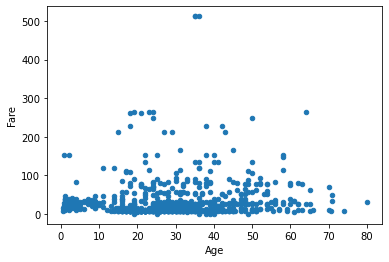

In [488]:
titanic.plot.scatter(x='Age',y='Fare')
tt=titanic.dropna()
print(f"Correlation between age and fare: {titanic[['Age','Fare']].dropna().corr().values[0][1]:.2f}")

Is this small positive correlation "true" or due to chance? Let us run a statistical test:

In [493]:
import seaborn as sns
import pandas as pd
import scipy.stats as stats

tt = titanic[['Age','Fare']].dropna()

# Extract the 'age' and 'fare' columns
age = tt['Age']
fare = tt['Fare']

# Perform a Pearson correlation test
r, p_value = stats.pearsonr(age, fare)

# Define the significance level
alpha = 0.05

# Display the results
print(f"Pearson correlation coefficient (r): {r}")
print(f"P-value: {p_value}")

# Compare the p-value to alpha
if p_value <= alpha:
    print("Reject the null hypothesis. There is a significant correlation between age and fare.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between age and fare.")


Pearson correlation coefficient (r): 0.09606669176903891
P-value: 0.010216277504447006
Reject the null hypothesis. There is a significant correlation between age and fare.


The p-value is small enough to reject the null hypothesis: the correlation is small but statistically significant.

Similar tests exist for Spearman coefficient:

In [499]:
import seaborn as sns
import pandas as pd
import scipy.stats as stats

tt = titanic[['Age','Fare']].dropna()

# Extract the 'age' and 'fare' columns
age = tt['Age']
fare = tt['Fare']

# Perform a Pearson correlation test
r, p_value = stats.spearmanr(age, fare)

# Define the significance level
alpha = 0.05

# Display the results
print(f"Spearman correlation coefficient (r): {r}")
print(f"P-value: {p_value}")

# Compare the p-value to alpha
if p_value <= alpha:
    print("Reject the null hypothesis. There is a significant correlation between age and fare.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between age and fare.")


Spearman correlation coefficient (r): 0.1350512177342878
P-value: 0.00029580903243060916
Reject the null hypothesis. There is a significant correlation between age and fare.


## Assessing whether a Sample is Normally Distributed
While the Normal distribution is pervasive, in some cases, it is useful to assess whether a given sample follows a normal distribution before assuming this is true. Let us consider the dataset of heights and weights and plot the distribution of weights:

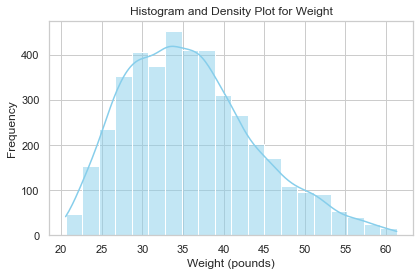

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
hw = pd.read_csv('http://antoninofurnari.it/downloads/height_weight.csv')
hw['height'] = (hw['height'] / 2.54).astype(int)  # Convert height to inches
hw['weight'] = hw['weight'] / 2.205               # Convert weight to pounds

# Set up the plotting style
sns.set(style="whitegrid")

# Plotting for weight
sns.histplot(hw['weight'], kde=True, color="skyblue", bins=20)
plt.title('Histogram and Density Plot for Weight')
plt.xlabel('Weight (pounds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Does the distribution look Gaussian? Let us compute Skewness and Kurtosis:

In [9]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Load and preprocess the data
hw = pd.read_csv('http://antoninofurnari.it/downloads/height_weight.csv')
hw['height'] = (hw['height'] / 2.54).astype(int)  # Convert height to inches
hw['weight'] = hw['weight'] / 2.205               # Convert weight to pounds

# Calculate skewness and kurtosis for weight
weight_skewness = skew(hw['weight'])
weight_kurtosis = kurtosis(hw['weight'])  

print(f"Skewness of weight: {weight_skewness:.2f}")
print(f"Kurtosis of weight: {weight_kurtosis:.2f}")

Skewness of weight: 0.57
Kurtosis of weight: -0.06


We not that:
* We have a positive Skewness: this indicates that the distribution is skewed towards the right side (the right tail is longer) as compared to a Normal distribution;
* We have a Kurtosis slightly lower than zero: the distribution is slightly "flatter" than a Normal distribution.

While Skewness and Kurtosis can help characterize deviations from normality, there are tests which can be used.

### Quantile-Quantile Plots (Q-Q Plots)
One common way to do so is using the Quantile-Quantile plots. The basic idea is to **compare the quantiles of the empirical data distribution with the theoretical quantiles of the reference distribution**. To avoid scale issues, **the empirical data is first transformed into z-scores**. If the sample follows the theoretical distribution, the quantiles will match. By plotting the empirical quantiles against the theoretical ones, we should obtain a set of points that lie on the line $y=x$. In the following graph, we show the q-q plot for the weight sample in our weight-height dataset:

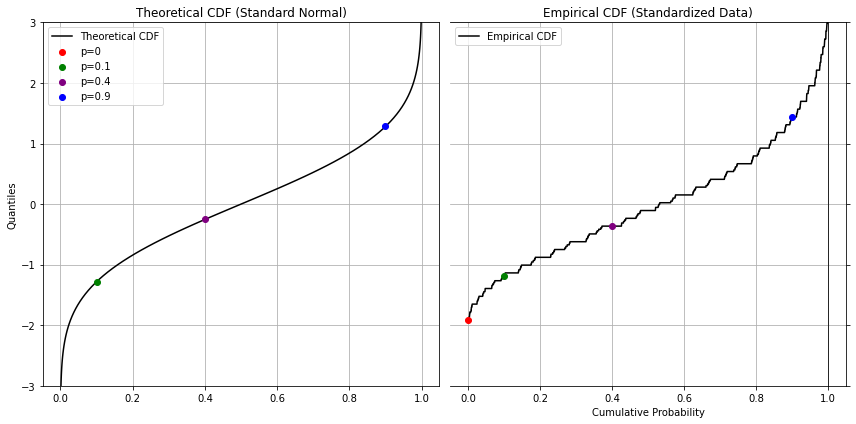

In [24]:
import numpy as np
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load and prepare the data
hw = pd.read_csv('http://antoninofurnari.it/downloads/height_weight.csv')
hw['weight'] = hw['weight'] / 2.205

# Standardize the weight data
standardized_weights = (hw['weight'] - hw['weight'].mean()) / hw['weight'].std()

# Calculate the ECDF of the standardized data
ecdf = ECDF(standardized_weights)

# Define x values for plotting the CDFs
x_values = np.linspace(-3, 3, 100)
theoretical_cdf_values = norm.cdf(x_values)

# Define probabilities to highlight
probabilities_to_highlight = [0, 0.1, 0.4, 0.9]
colors = ['red', 'green', 'purple', 'blue']

# Compute corresponding x-values for each probability in both the theoretical CDF and ECDF
theoretical_points = norm.ppf(probabilities_to_highlight)
empirical_points = [np.percentile(standardized_weights, p * 100) for p in probabilities_to_highlight]

# Create the figure with horizontal subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True, gridspec_kw={'width_ratios': [1, 1]})

# Left Plot: Theoretical CDF of standard normal
ax1.plot(theoretical_cdf_values, x_values, label="Theoretical CDF", color="black")
ax1.set_ylabel("Quantiles")
ax1.set_title("Theoretical CDF (Standard Normal)")
ax1.grid(True)

# Highlight selected probability points on the theoretical CDF
for p, x_theor, color in zip(probabilities_to_highlight, theoretical_points, colors):
    ax1.scatter(p, x_theor, color=color, zorder=5, label=f'p={p}')

# Right Plot: ECDF of standardized data
ax2.plot(ecdf.y, ecdf.x, label="Empirical CDF", color="black")
ax2.set_xlabel("Cumulative Probability")
ax2.set_title("Empirical CDF (Standardized Data)")
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.grid(True)

# Move the y-axis to the right side of the plot
ax2.spines['left'].set_position(('data', 1))  # Move the left y-axis to the right
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()

# Highlight selected probability points on the ECDF
for p, x_emp, color in zip(probabilities_to_highlight, empirical_points, colors):
    ax2.scatter(p, x_emp, color=color, zorder=5)

# Set y-axis range to match quantiles
ax1.set_ylim(-3, 3)
ax2.set_ylim(-3, 3)

# Show plot with legend
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()


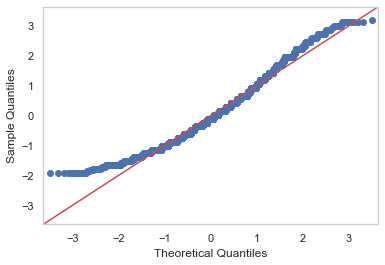

In [13]:
from statsmodels.graphics.gofplots import qqplot
import pandas as pd
from matplotlib import pyplot as plt

hw=pd.read_csv('http://antoninofurnari.it/downloads/height_weight.csv')
hw['height'] = (hw['height']/2.54).astype(int)
hw['weight'] = hw['weight']/2.205

#fit=True indica che bisogna fare fit della distribuzione sui dati
#e che bisogna inoltre standardizzare i dati
#line='45' indica di plottare una linea a 45 gradi per riferimento
qqplot(hw['weight'], fit=True, line='45')
plt.grid()
plt.show()

The plot relates the "theoretical" quantiles with those of the sample. The fact that the points on the plot do not lie on the diagonal indicates that there is a discrepancy between the empirical data distribution and the Gaussian distribution.

Analyzing a Q-Q Plot can be complex. In practice, **there are some guidelines to understand how a sample deviates from a theoretical distribution**. Referring to the Gaussian distribution, we will see how to interpret from a Q-Q plot if a sample follows a distribution that is:

* Right-skewed
* Left-skewed
* Symmetric with long tails
* Symmetric with short tails

The following figure compares the q-q plots of different distributions:

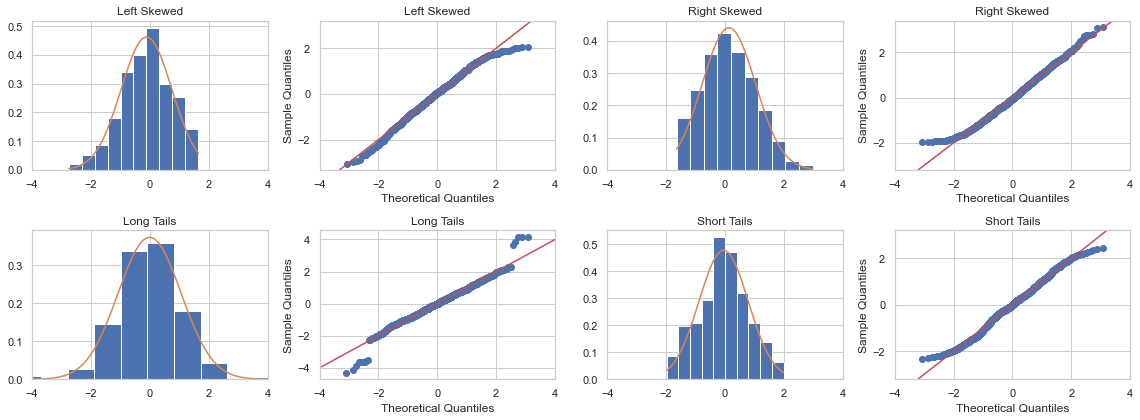

In [14]:
import numpy as np
from scipy.stats import norm
asimmetrica_sinistra = np.sort(np.random.normal(0,1,1000))[50:] #genero una distribuzione simmetrica e "la taglio"
asimmetrica_destra = np.sort(np.random.normal(0,1,1000))[:950] #genero una distribuzione simmetrica e "la taglio"

code_lunghe = np.random.normal(0,1,1000)
code_lunghe[np.abs(code_lunghe)>2.5]*=1.5 #"allunghiamo" le code
code_corte = np.random.normal(0,1,1000)
code_corte[np.abs(code_corte)>2]*=0.1#"accorciamo" le code

plt.figure(figsize=(16,6))
plt.subplot(241)
plt.hist(asimmetrica_destra, density=True)
g = norm(asimmetrica_destra.mean(),asimmetrica_destra.std())
x=np.linspace(np.min(asimmetrica_destra),np.max(asimmetrica_destra),100)
plt.plot(x,g.pdf(x))
plt.title('Left Skewed')
plt.xlim([-4,4])

ax=plt.subplot(242)
qqplot(asimmetrica_destra, fit=True, line ='45', ax=ax)
plt.title('Left Skewed')
plt.xlim([-4,4])

plt.subplot(243)
plt.hist(asimmetrica_sinistra, density=True)
g = norm(asimmetrica_sinistra.mean(),asimmetrica_sinistra.std())
x=np.linspace(np.min(asimmetrica_sinistra),np.max(asimmetrica_sinistra),100)
plt.plot(x,g.pdf(x))
plt.title('Right Skewed')
plt.xlim([-4,4])

ax=plt.subplot(244)
qqplot(asimmetrica_sinistra, fit=True, line ='45', ax=ax)
plt.title('Right Skewed')
plt.xlim([-4,4])

plt.subplot(245)
plt.hist(code_lunghe, density=True)
g = norm(code_lunghe.mean(),code_lunghe.std())
x=np.linspace(np.min(code_lunghe),np.max(code_lunghe),100)
plt.plot(x,g.pdf(x))
plt.title('Long Tails')
plt.xlim([-4,4])

ax=plt.subplot(246)
qqplot(code_lunghe, fit=True, line ='45', ax=ax)
plt.title('Long Tails')
plt.xlim([-4,4])

plt.subplot(247)
plt.hist(code_corte, density=True)
g = norm(code_corte.mean(),code_corte.std())
x=np.linspace(np.min(code_corte),np.max(code_corte),100)
plt.plot(x,g.pdf(x))
plt.title('Short Tails')
plt.xlim([-4,4])

ax=plt.subplot(248)
qqplot(code_corte, fit=True, line ='45', ax=ax)
plt.title('Short Tails')
plt.xlim([-4,4])

plt.tight_layout()
plt.show()

Every time we observe a Q-Q Plot, we can relate these features to characteristics of the distribution. Clearly, these characteristics can also combine to create more complex Q-Q Plots, as seen in the case of weights. Now, we have the tools to analyze the Q-Q Plot of weights:

* The deviation for quantiles less than -1 suggests a left-skew (see Q-Q Plot for "Left-Skewed").
* The deviation for quantiles greater than 2 indicates that there are more high values than expected in a Gaussian distribution, so the right tail is a bit "longer" than it should be.
* Points below the diagonal around the quantile $0$ indicate that the peak of the distribution is lower than it should be in the case of a Gaussian distribution.


We will see how we can conduct a statistical test to check if a sample is Gaussian in the next lessons.

### Shapiro-Wilk Normality Test
The Shapiro-Wilk test is a statistical test used to assess whether a sample follows a Gaussian (normal) distribution. It is used with small samples ($n\leq 2000$) It works by comparing the observed data to what you would expect if the data were drawn from a truly Gaussian distribution. 

We will not see the formal details of this test, but we can use it in our analyses. Here is the result on the `weight` sample in our height-weight dataset:

In [17]:
from scipy.stats import shapiro
import pandas as pd

hw=pd.read_csv('http://antoninofurnari.it/downloads/height_weight.csv')
hw['height'] = (hw['height']/2.54).astype(int)
hw['weight'] = hw['weight']/2.205

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(hw['weight'])

# Set the significance level (alpha)
alpha = 0.05

print(f"Test statistic: {statistic:0.2f}")
print(f"P-value: {p_value:0.2f}")

# Check the p-value against the significance level
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")


Test statistic: 0.97
P-value: 0.00
Sample does not look Gaussian (reject H0)


### D'Agostino's K-squared test

When samples are large ($n \geq 50$), the D'Agostino's K-squared test is more used. It is based on Skewness and Kurtosis. Here is the result for our example:

In [18]:
import pandas as pd
from scipy.stats import normaltest

# Load and preprocess the data
hw = pd.read_csv('http://antoninofurnari.it/downloads/height_weight.csv')
hw['height'] = (hw['height'] / 2.54).astype(int)
hw['weight'] = hw['weight'] / 2.205

# Perform D'Agostino's K-squared test
statistic, p_value = normaltest(hw['weight'])

# Set the significance level (alpha)
alpha = 0.05

print(f"Test statistic: {statistic:.2f}")
print(f"P-value: {p_value:.2f}")

# Check the p-value against the significance level
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")


Test statistic: 201.64
P-value: 0.00
Sample does not look Gaussian (reject H0)


## References

* Chapters 6-8 of \[1\];
* Parts of chapter 9 of \[2\].

\[1\] Gonick, L., & Smith, W. (1993). The cartoon guide to statistics. HarperCollins Publishers, Inc.

\[2\] Heumann, Christian, and Michael Schomaker Shalabh. Introduction to statistics and data analysis. Springer International Publishing Switzerland, 2016.